# Tarefa 02 Módulo 05

O nosso projeto desta sequência de módulos do curso será um aprofundamento da demonstração sobre classificação de risco de crédito que vimos lá no comecinho. Pois recebemos uma base já montada pra nós. Tenha certeza de que ela passou por um longo processamento até ficar daquele jeito. Neste exercício vamos exercitar o que aprendemos nas ultimas aulas e montar a variável resposta da base do nosso projeto.

#### Marcação de bom e mau
O objetivo da modelagem é classificar o risco de inadimplência, ou como se diz no meio, o risco de *default*. Podemos fazer longas discussões sobre o conceito de *default* com base em estudos e exigências regulatórias, para efeitos deste estudo, um cliente em *default* é aquele que está em 60 dias de atraso ou mais. Então classificaremos os clientes como 'bons' e 'maus' assim:
- **Maus** pagadores: são aqueles que entraram em 'default' (atraso 60 dias ou mais) nos 24 meses seguintes à aquisição do cartão de crédito.
- **Bons** pagadores: são considerados todos os demais.
- **Excluídos**: Clientes que não adquiriram um cartão de crédito (seja por recusa, seja por desistência) não possuem informações de pagamento, portanto não se pode identificar se são bons ou maus. Há uma longa discussão e literatura sobre *inferência de rejeitados* que está fora do escopo deste exercício.

#### Bases disponíveis
Temos duas bases importantes aqui: uma de propostas, com diversas informações dos vários solicitantes de cartão de crédito, e uma base de pagamentos. A base de pagamentos será utilizada para identificar a ocorrência de *default*. A base de propostas tem diversas informações coletadas no momento da solicitação do crédito (isto é importante: qualquer informação posterior a essa data é impossível de ser coletada na aplicação do modelo e não pode ser utilizada).

As variáveis delas são:

Base de propostas - application_records.csv

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| CODE_GENDER| M = 'Masculino'; F = 'Feminino' |M/F|
| FLAG_OWN_CAR| Y = 'possui'; N = 'não possui' |Y/N|
| FLAG_OWN_REALTY| Y = 'possui'; N = 'não possui' |Y/N|
| CNT_CHILDREN| Quantidade de filhos |inteiro|
| AMT_INCOME_TOTAL| Annual income |inteiro|
| NAME_INCOME_TYPE|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| NAME_EDUCATION_TYPE| Nível de educação (ex: secundário, superior etc) |texto|
| NAME_FAMILY_STATUS | Estado civil (ex: solteiro, casado etc)| texto |
| NAME_HOUSING_TYPE | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| DAYS_BIRTH | Count backwards from current day (0), -1 means yesterday |inteiro|
| DAYS_EMPLOYED | Count backwards from current day (0), -1 means yesterday |inteiro|
| FLAG_MOBIL | Indica se possui celular (1 = sim, 0 = não) |binária|
| FLAG_WORK_PHONE | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| FLAG_PHONE | Indica se possui telefone (1 = sim, 0 = não) |binária|
| FLAG_EMAIL | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| OCCUPATION_TYPE | Occupation	 |Qualitativa|
| CNT_FAM_MEMBERS | quantidade de pessoas na residência |inteiro|

Base de pagamentos - pagamentos_largo.csv  

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| mes_00 a mes_24| faixa de atraso mês a mês do cliente <br>0: 1-29 days past due &nbsp;&nbsp;&nbsp;&nbsp; 1: 30-59 days past due <br />2: 60-89 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 3: 90-119 days overdue <br /> 4: 120-149 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 5: more than 150 days <br />C: paid off that month &nbsp;&nbsp;&nbsp;&nbsp; X: No loan for the month |Qualitativa|

#### Construindo a variável resposta
A base de pagamentos está em um formato de 'base larga'. Essa base possui informações de pagamentos do cliente mês a mês a partir do mês de aquisição do crédito (mês 0) até o vigésimo quarto mês após a aquisição do crédito (mês 24). Utilizaremos essa base para determinar se um proponente é considerado 'bom pagador' ou caso apresente atraso representativo, será considerado 'mau pagador'.

#### Base larga vs base longa
A base ser larga significa que há uma linha para cada cliente, e que as informações estarão nas colunas, em contraste com a 'base longa', em que haveria uma linha para cada combinação cliente/mês, uma coluna indicando o cliente, outra indicando o mês, e apenas uma coluna com a informação do atraso.

#### Tarefa 1) Marcar *default* no mês
Faça uma indicadora de se o cliente está em *default* em cada uma das marcações (mes_00 a mes_24). Dica: você pode utilizar o método ```.isin()``` do Pandas. Consulte a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) caso necessário.

#### Tarefa 2) 'bons' e 'maus' ao longo de todos os 24 meses de desempenho
Marque para cada cliente se ele teve pelo menos um episódio de *default* entre o mês 0 e o mês 24. Dica: o método ```sum()``` pode ajudar. Caso precise, consulte a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) e procure pelo argumento ```axis```, você viu outros métodos que possuem esse argumento também. Tendo o número de meses em default de cada cliente, basta marcar ```True``` para todos aqueles que possuem pelo menos 1 mês em *default* e ```False``` para os demais.

#### Tarefa 3) Marcando proponentes expostos ao risco de crédito
Marcando proponentes que se tornaram tomadores: lembre-se de que clientes que não adquiriram o cartão devem ser desconsiderados. A base de pagamentos possui apenas clientes que adquiriram cartão de crédito, então você pode selecionar somente os clientes da base de propostas que se encontram na base de pagamentos.

#### Tarefa 4) Consolidando as informações
Faça uma junção das informações da base de propostas com a variável de *default* que você acabou de construir. Talvez você consiga realizar a tarefa 3 e tarefa 4 em uma única linha de código ;)

#### Tarefa 5) Verificando
Faça uma contagem dos valores do *default* que você construiu.

In [2]:
import pandas as pd

# Carregar as bases
propostas = pd.read_csv('/content/application_record.csv')
pagamentos = pd.read_csv('/content/pagamentos_largo.csv')

# Selecionar apenas as colunas de meses
colunas_meses = [col for col in pagamentos.columns if 'mes_' in col]

# Criar uma base booleana: True se entrou em default (>=60 dias)
pagamentos_default = pagamentos.copy()
pagamentos_default[colunas_meses] = pagamentos[colunas_meses].isin(['2', '3', '4', '5'])

# Visualizar
pagamentos_default.head()

,ID,mes_0,mes_1,mes_10,mes_11,mes_12,mes_13,mes_14,mes_15,mes_16,...,mes_22,mes_23,mes_24,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9
0,5001718,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5001719,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5001720,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5001723,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5001726,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Filtrar proponentes expostos ao risco de crédito (presentes na base de pagamentos)
propostas_elegiveis = propostas[propostas['ID'].isin(pagamentos['ID'])]

# Consolidar as informações (juntar propostas com a variável default)
dados_consolidados = pd.merge(propostas_elegiveis, pagamentos_default[['ID', 'default']], on='ID', how='left')

# Visualizar o resultado
display(dados_consolidados.head())

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,default
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,False
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,False


In [3]:
# Marcar se o cliente teve pelo menos um default nos 24 meses
pagamentos_default['default'] = pagamentos_default[colunas_meses].sum(axis=1) >= 1

# Visualizar o resultado
display(pagamentos_default[['ID', 'default']].head())

,ID,default
0,5001718,False
1,5001719,False
2,5001720,False
3,5001723,False
4,5001726,False


Contagem de clientes por status de default:
default
False    16260
True       390
Name: count, dtype: int64


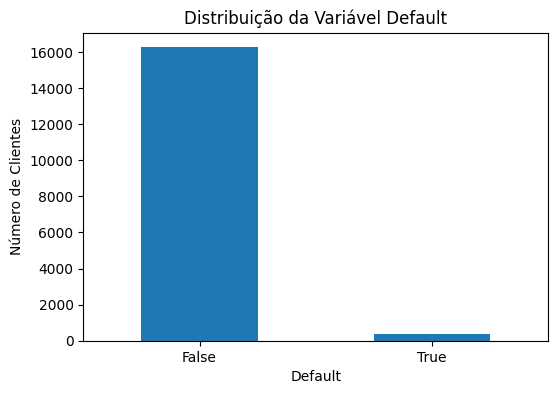

In [5]:
# Verificar a contagem dos valores do default
default_counts = dados_consolidados['default'].value_counts()
print("Contagem de clientes por status de default:")
print(default_counts)

# Opcional: Visualizar a proporção
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
default_counts.plot(kind='bar')
plt.title('Distribuição da Variável Default')
plt.xlabel('Default')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

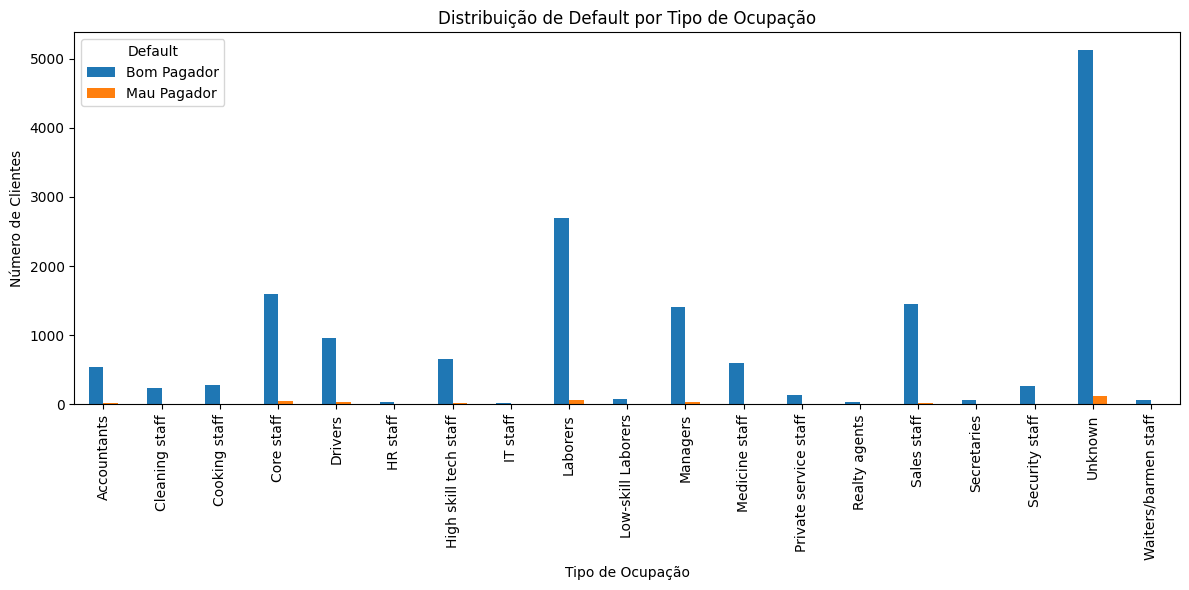

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preencher valores ausentes em OCCUPATION_TYPE para incluir na visualização
dados_consolidados['OCCUPATION_TYPE'] = dados_consolidados['OCCUPATION_TYPE'].fillna('Unknown')

# Criar uma tabela de contagem cruzada
occupation_default_counts = pd.crosstab(dados_consolidados['OCCUPATION_TYPE'], dados_consolidados['default'])

# Visualizar a distribuição usando um gráfico de barras agrupado
occupation_default_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição de Default por Tipo de Ocupação')
plt.xlabel('Tipo de Ocupação')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90)
plt.legend(title='Default', labels=['Bom Pagador', 'Mau Pagador'])
plt.tight_layout()
plt.show()

In [8]:
display(dados_consolidados.describe(include='all'))

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,default
count,1.665000e+04,16650,16650,16650,16650.000000,1.665000e+04,16650,16650,16650,16650,16650.000000,16650.000000,16650.0,16650.000000,16650.000000,16650.000000,11405,16650.000000,16650
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,2
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,False
freq,NaN,11201,10178,11176,NaN,NaN,8565,11245,11680,14974,NaN,NaN,NaN,NaN,NaN,NaN,2767,NaN,16260
mean,5.077805e+06,NaN,NaN,NaN,0.433153,1.873345e+05,NaN,NaN,NaN,NaN,-16176.622162,58917.002883,1.0,0.225225,0.295676,0.088889,NaN,2.211892,NaN
std,4.199211e+04,NaN,NaN,NaN,0.739395,1.015606e+05,NaN,NaN,NaN,NaN,4098.525432,137548.027970,0.0,0.417743,0.456360,0.284592,NaN,0.903755,NaN
min,5.008806e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,NaN
25%,5.041824e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19495.000000,-3317.250000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,NaN
50%,5.069312e+06,NaN,NaN,NaN,0.000000,1.620000e+05,NaN,NaN,NaN,NaN,-15875.000000,-1712.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,NaN
75%,5.115448e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12729.000000,-432.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,NaN


**2 — Bons e maus ao longo dos 24 meses**

Se o cliente teve ao menos um mês em default (True) → ele é “mau pagador”, caso contrário é “bom pagador”

In [12]:
# Identify columns with missing values
missing_values = dados_consolidados.isnull().sum()
print("Missing values before treatment:")
print(missing_values[missing_values > 0])

# Fill missing values in OCCUPATION_TYPE with 'Unknown'
dados_consolidados['OCCUPATION_TYPE'] = dados_consolidados['OCCUPATION_TYPE'].fillna('Unknown')

# Identify columns with missing values after filling OCCUPATION_TYPE
missing_values_after_occupation = dados_consolidados.isnull().sum()
print("\nMissing values after treating OCCUPATION_TYPE:")
print(missing_values_after_occupation[missing_values_after_occupation > 0])

Missing values before treatment:
Series([], dtype: int64)

Missing values after treating OCCUPATION_TYPE:
Series([], dtype: int64)


In [19]:
# Identify categorical columns to encode
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                    'OCCUPATION_TYPE']

# Apply One-Hot Encoding to categorical columns
dados_consolidados_encoded = pd.get_dummies(dados_consolidados, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(dados_consolidados_encoded.head())

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,True,False,False
1,5008810,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False
2,5008811,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False
3,5112956,0,270000.0,-16872,-769,1,1,1,1,2.0,...,False,False,False,False,False,False,False,False,False,False
4,5008825,0,130500.0,-10669,-1103,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Select the numerical columns
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

# Generate descriptive statistics for these columns
numerical_stats = dados_consolidados_encoded[numerical_cols].describe()
print("Descriptive Statistics for Numerical Columns:")
display(numerical_stats)

Descriptive Statistics for Numerical Columns:


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
count,16650.000000,1.665000e+04,16650.000000,16650.000000,16650.000000
mean,0.433153,1.873345e+05,-16176.622162,58917.002883,2.211892
std,0.739395,1.015606e+05,4098.525432,137548.027970,0.903755
min,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.000000
25%,0.000000,1.215000e+05,-19495.000000,-3317.250000,2.000000
50%,0.000000,1.620000e+05,-15875.000000,-1712.500000,2.000000
75%,1.000000,2.250000e+05,-12729.000000,-432.000000,3.000000
max,14.000000,1.575000e+06,-8041.000000,365243.000000,15.000000


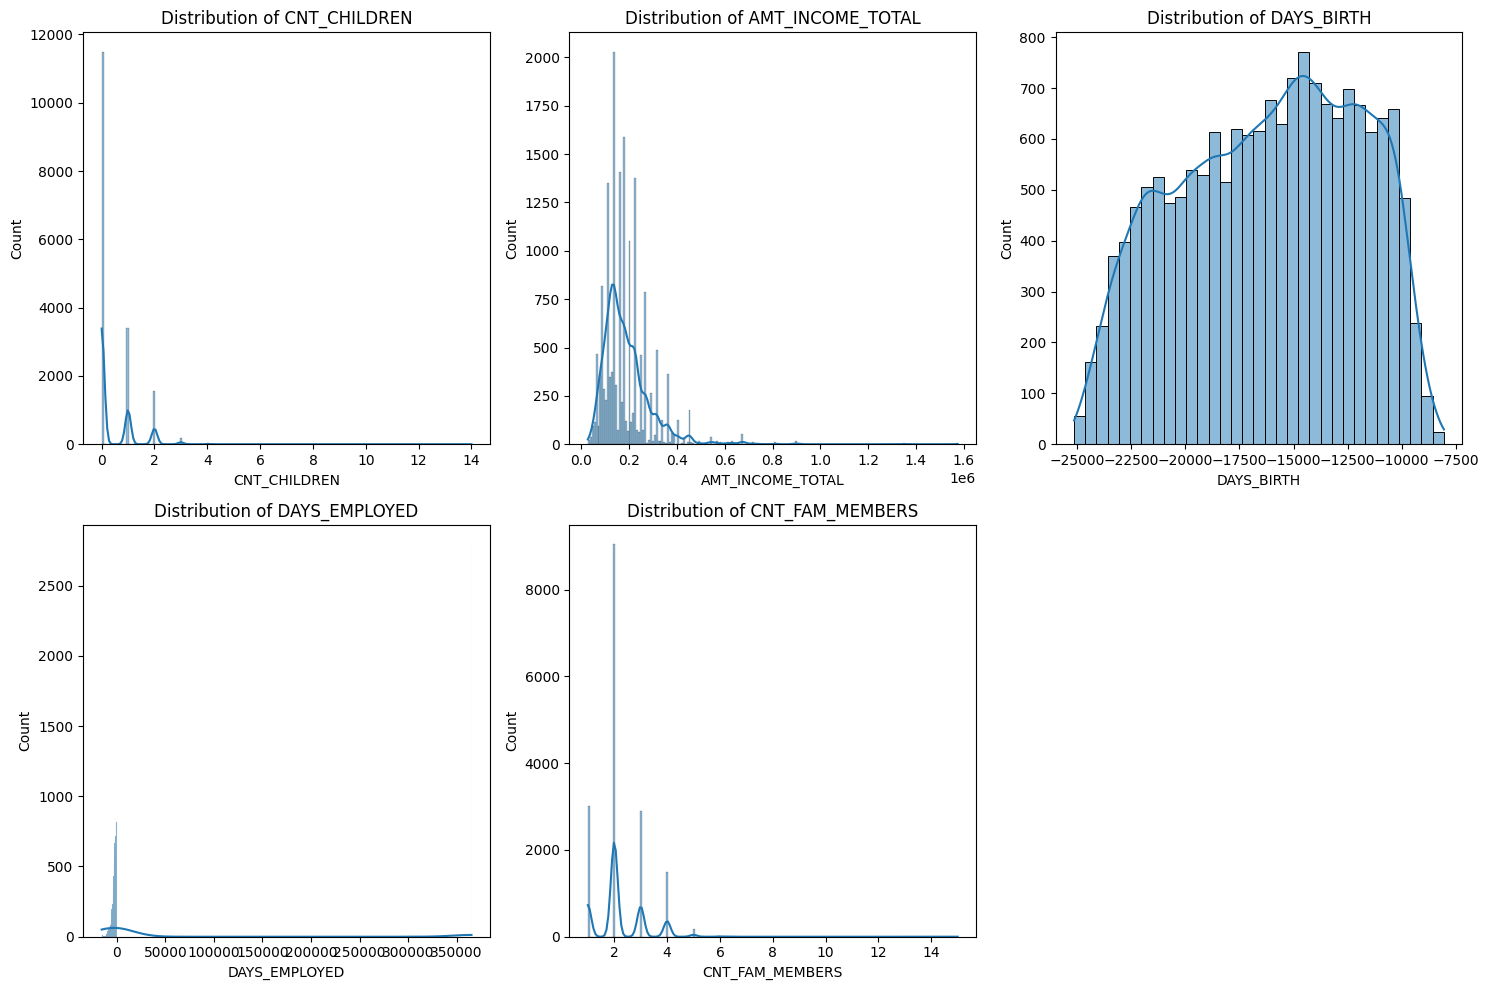

In [15]:
# Visualize the distributions of numerical columns using histograms
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(dados_consolidados_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Contagem de clientes:
Bons Pagadores    16260
Maus Pagadores      390
Name: count, dtype: int64


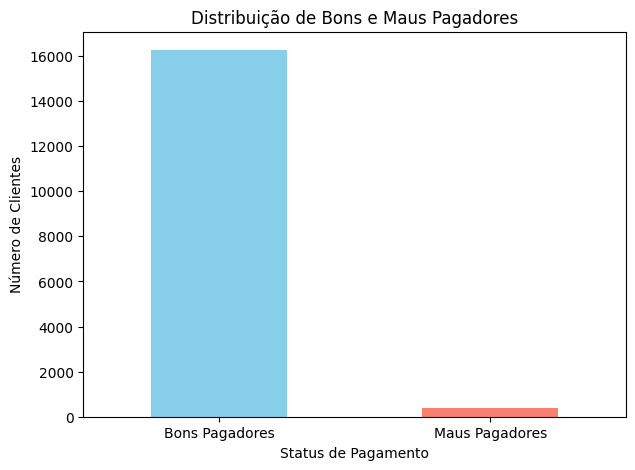

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de bons e maus pagadores
contagem_default = base_final['default'].value_counts()

# Renomear os rótulos para melhor visualização
contagem_default.index = ['Bons Pagadores', 'Maus Pagadores']

print("Contagem de clientes:")
print(contagem_default)

# Visualizar a distribuição em um gráfico de barras
plt.figure(figsize=(7, 5))
contagem_default.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição de Bons e Maus Pagadores')
plt.xlabel('Status de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

## Separação dos dados

### Subtask:
Dividir o DataFrame em conjuntos de treino e teste.


In [17]:
from sklearn.model_selection import train_test_split

# Definir features (X) e variável alvo (y)
X = dados_consolidados_encoded.drop(['ID', 'default'], axis=1)
y = dados_consolidados_encoded['default']

# Dividir os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=42)

# Exibir as formas dos conjuntos resultantes
print("Shape de X_treino:", X_treino.shape)
print("Shape de X_teste:", X_teste.shape)
print("Shape de y_treino:", y_treino.shape)
print("Shape de y_teste:", y_teste.shape)

Shape de X_treino: (12487, 47)
Shape de X_teste: (4163, 47)
Shape de y_treino: (12487,)
Shape de y_teste: (4163,)


**3 — Selecionar apenas clientes expostos ao risco**

A base pagamentos_largo.csv já contém apenas clientes que adquiriram o cartão, então você deve filtrar as propostas por esses IDs

In [20]:
# Mantém apenas clientes que aparecem na base de pagamentos
propostas_expostas = propostas[propostas['ID'].isin(pagamentos_default['ID'])]

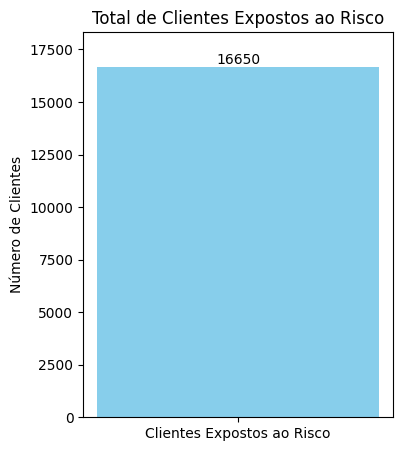

In [44]:
import matplotlib.pyplot as plt

# Contagem de clientes expostos ao risco (obtida da Tarefa 3)
num_clientes_expostos = propostas_expostas.shape[0]

# Criar um gráfico de barras simples
plt.figure(figsize=(4, 5))
plt.bar(['Clientes Expostos ao Risco'], [num_clientes_expostos], color='skyblue')
plt.ylabel('Número de Clientes')
plt.title('Total de Clientes Expostos ao Risco')
plt.ylim(0, num_clientes_expostos * 1.1) # Ajustar limite y para melhor visualização
plt.text(0, num_clientes_expostos, str(num_clientes_expostos), ha='center', va='bottom') # Adicionar o número acima da barra
plt.show()

In [43]:
# Contar o número de clientes expostos ao risco
num_clientes_expostos = propostas_expostas.shape[0]

print(f"Número de clientes expostos ao risco (presentes na base de pagamentos): {num_clientes_expostos}")

Número de clientes expostos ao risco (presentes na base de pagamentos): 16650


**4 — Consolidar informações**

Vamos juntar as informações das propostas com o indicador de default.

In [21]:
# Selecionar apenas ID e default para o merge
default_status = pagamentos_default[['ID', 'default']]

# Fazer o merge das bases
base_final = propostas_expostas.merge(default_status, on='ID', how='left')

# Visualizar
base_final.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,default
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,False
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,False


**5 — Verificar**

Vamos verificar a contagem de bons e maus pagadores.

In [22]:
print(base_final['default'].value_counts())
print(base_final['default'].value_counts(normalize=True))  # proporção

default
False    16260
True       390
Name: count, dtype: int64
default
False    0.976577
True     0.023423
Name: proportion, dtype: float64


In [23]:
import pandas as pd

# Carregar as bases
propostas = pd.read_csv('/content/application_record.csv')
pagamentos = pd.read_csv('/content/pagamentos_largo.csv')

# Selecionar apenas as colunas de meses
colunas_meses = [col for col in pagamentos.columns if 'mes_' in col]

# Criar uma base booleana: True se entrou em default (>=60 dias)
pagamentos_default = pagamentos.copy()
pagamentos_default[colunas_meses] = pagamentos[colunas_meses].isin(['2', '3', '4', '5'])

# Visualizar
display(pagamentos_default.head())

,ID,mes_0,mes_1,mes_10,mes_11,mes_12,mes_13,mes_14,mes_15,mes_16,...,mes_22,mes_23,mes_24,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9
0,5001718,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5001719,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5001720,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5001723,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5001726,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Contagem de clientes por status de default:
default
False    16260
True       390
Name: count, dtype: int64


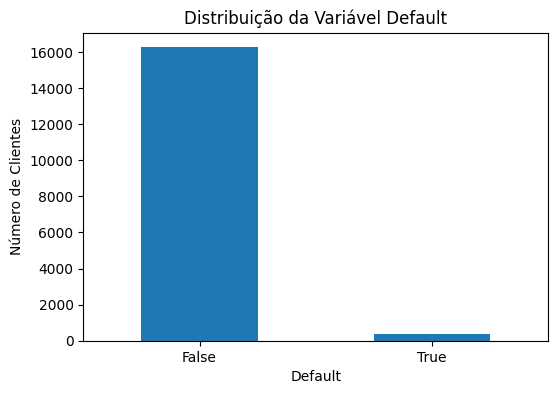

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar a contagem dos valores do default
contagem_default = base_final['default'].value_counts()
print("Contagem de clientes por status de default:")
print(contagem_default)

# Visualizar a proporção
plt.figure(figsize=(6, 4))
contagem_default.plot(kind='bar')
plt.title('Distribuição da Variável Default')
plt.xlabel('Default')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

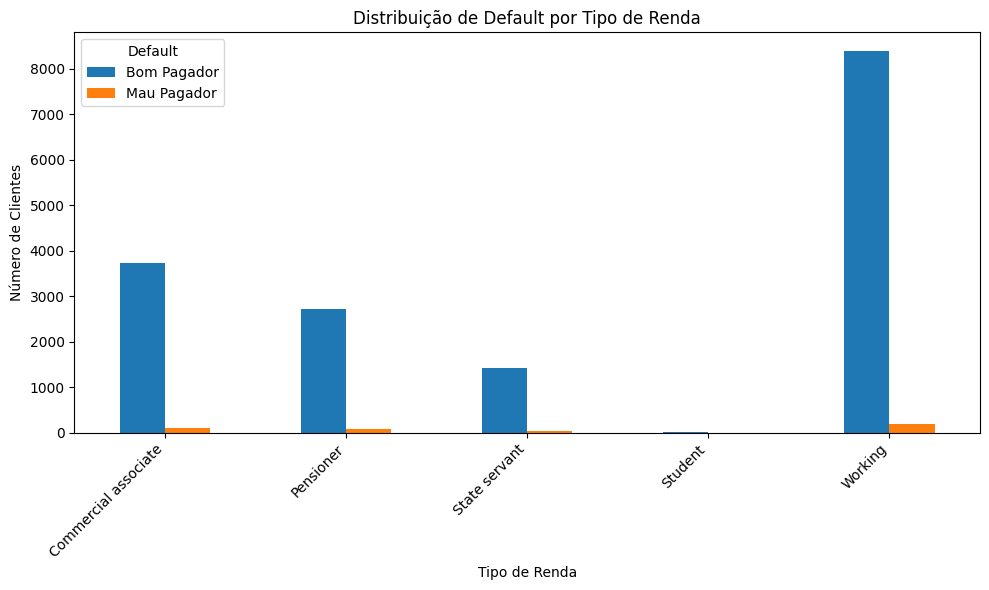

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma tabela de contagem cruzada entre NAME_INCOME_TYPE e default
income_default_counts = pd.crosstab(base_final['NAME_INCOME_TYPE'], base_final['default'])

# Visualizar a distribuição usando um gráfico de barras agrupado
income_default_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Default por Tipo de Renda')
plt.xlabel('Tipo de Renda')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotacionar rótulos para melhor leitura
plt.legend(title='Default', labels=['Bom Pagador', 'Mau Pagador'])
plt.tight_layout()
plt.show()